In [12]:
! pip install -q ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 715.0/715.0 kB 4.2 MB/s eta 0:00:00


In [1]:
! pip install kaggle --upgrade --quite


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --quite


In [18]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [11]:
!nvidia-smi

Fri Feb 16 11:23:50 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [9]:
from google.colab import files
files.upload()

! kaggle datasets download siddharthkumarsah/ships-in-aerial-images
! unzip ships-in-aerial-images.zip -d ships-in-aerial-images

Streaming output truncated to the last 5000 lines.
  inflating: ships-in-aerial-images/ships-aerial-images/train/labels/x0593_png.rf.33fd03bd0d9896e31b73ac56c1e458c8.txt  
  inflating: ships-in-aerial-images/ships-aerial-images/train/labels/x0594_png.rf.1a86349573567a368a653b5b39fff4af.txt  
  inflating: ships-in-aerial-images/ships-aerial-images/train/labels/x0594_png.rf.ff6551627101ade7c4ecd6887fa45546.txt  
  inflating: ships-in-aerial-images/ships-aerial-images/train/labels/x0595_png.rf.bc03f4a3bc686c5d239d8552ce57b5f5.txt  
  inflating: ships-in-aerial-images/ships-aerial-images/train/labels/x0597_png.rf.918ed233995c3645a1ca8d14bf35a81c.txt  
  inflating: ships-in-aerial-images/ships-aerial-images/train/labels/x0598_png.rf.94d8be92f98bf3ff36cf9f51b1e17bc9.txt  
  inflating: ships-in-aerial-images/ships-aerial-images/train/labels/x0598_png.rf.a5b224c7880ba832c9d6d5aba3123e28.txt  
  inflating: ships-in-aerial-images/ships-aerial-images/train/labels/x0599_png.rf.d215436f7b245cf0a244

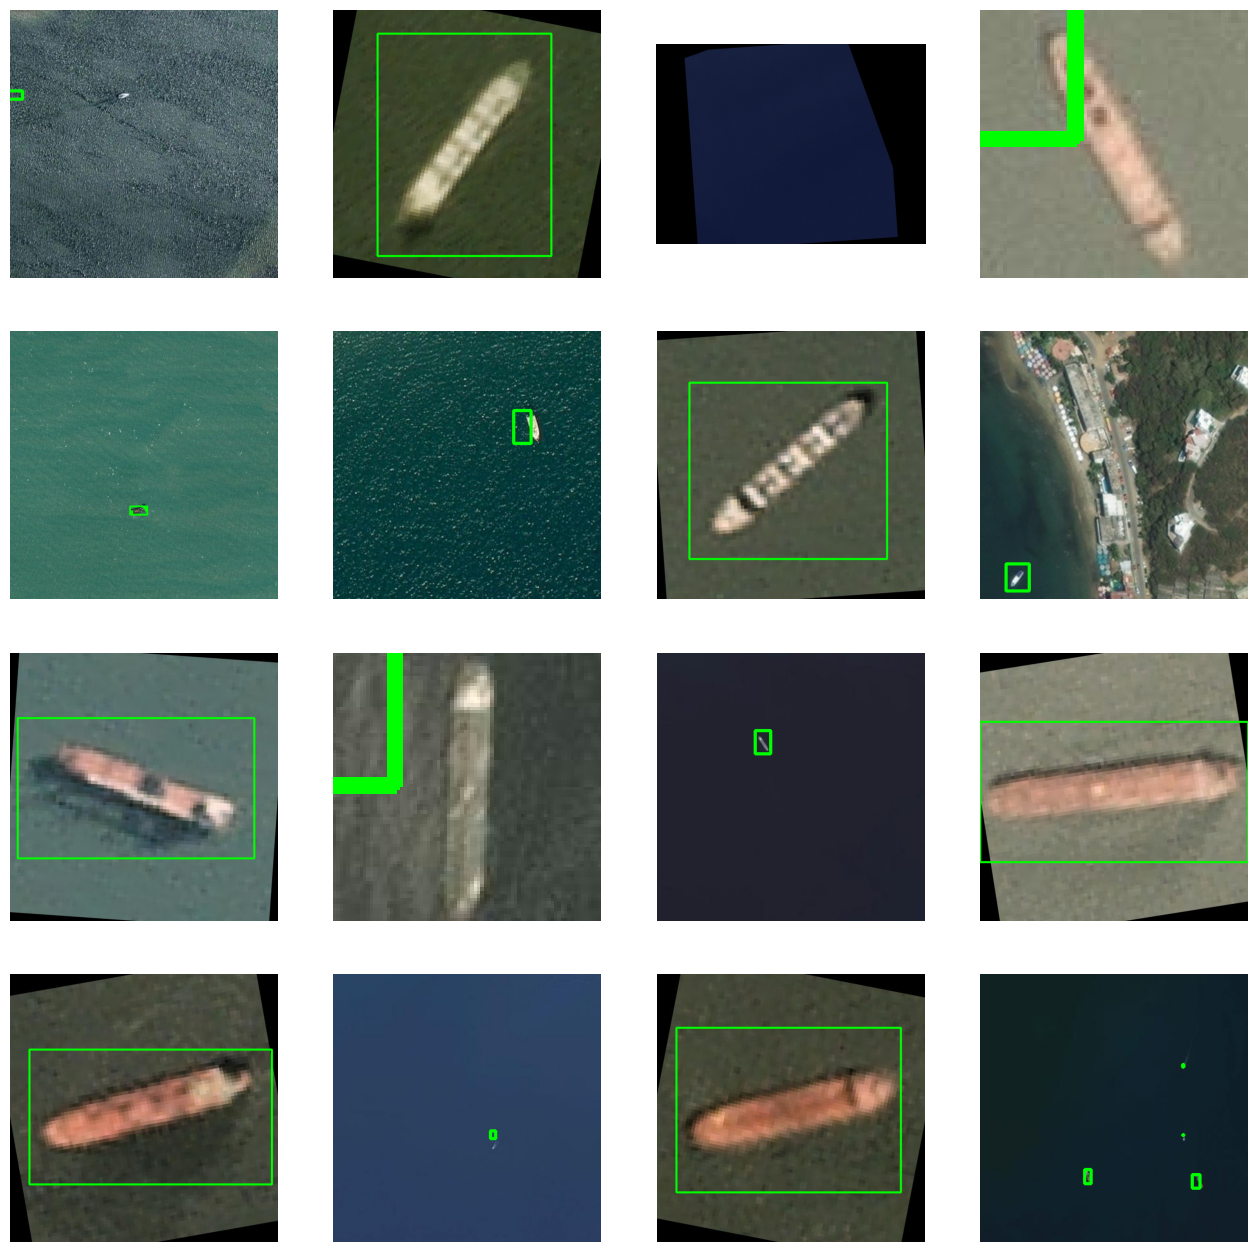

In [10]:
import os
import cv2
import random
import matplotlib.pyplot as plt

train_images = "/content/ships-in-aerial-images/ships-aerial-images/train/images"
train_labels = "/content/ships-in-aerial-images/ships-aerial-images/train/labels"

test_images = "/content/ships-in-aerial-images/ships-aerial-images/test/images"
test_labels = "/content/ships-in-aerial-images/ships-aerial-images/test/labels"

val_images = "/content/ships-in-aerial-images/ships-aerial-images/valid/images"
val_labels = "/content/ships-in-aerial-images/ships-aerial-images/valid/labels"

image_files = os.listdir(train_images)
random_images = random.sample(image_files, 16)

fig, axs = plt.subplots(4, 4, figsize=(16, 16))

for i, image_file in enumerate(random_images):
    row = i // 4
    col = i % 4

    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)

    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(train_labels, label_file)

    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")

    for label in labels:
        if len(label.split()) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_min = int((x_center - width/2) * image.shape[1])
        y_min = int((y_center - height/2) * image.shape[0])
        x_max = int((x_center + width/2) * image.shape[1])
        y_max = int((y_center + height/2) * image.shape[0])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)

    axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[row, col].axis('off')

plt.show()

In [13]:
from ultralytics import YOLO

model = YOLO('yolov8m.pt')

results = model.train(data="/content/ships-in-aerial-images/ships-aerial-images/data.yaml", epochs = 8, imgsz = 768, seed = 42, batch = 8, workers = 4)

100%|██████████| 49.7M/49.7M [00:00<00:00, 218MB/s]


Ultralytics YOLOv8.1.14 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/ships-in-aerial-images/ships-aerial-images/data.yaml, epochs=8, time=None, patience=50, batch=8, imgsz=768, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_l

100%|██████████| 755k/755k [00:00<00:00, 17.3MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 80.4MB/s]


AMP: checks passed ✅


train: Scanning /content/ships-in-aerial-images/ships-aerial-images/train/labels... 9697 images, 351 backgrounds, 2 corrupt: 100%|██████████| 9697/9697 [00:05<00:00, 1904.93it/s]

train: WARNING ⚠️ /content/ships-in-aerial-images/ships-aerial-images/train/images/1__20180714_180427_1029__-118-20071740708637_33-73029905538088_png.rf.330efa80ecbf49d6ceac7071288d64b4.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0249]
train: WARNING ⚠️ /content/ships-in-aerial-images/ships-aerial-images/train/images/1__20180714_180427_1029__-118-21100741654266_33-732092454738826_png.rf.7243f2b58b505e51950850f4b26081ba.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0079]


train: New cache created: /content/ships-in-aerial-images/ships-aerial-images/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 709, len(boxes) = 19454. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/ships-in-aerial-images/ships-aerial-images/valid/labels... 2165 images, 68 backgrounds, 0 corrupt: 100%|██████████| 2165/2165 [00:02<00:00, 961.10it/s] 


val: New cache created: /content/ships-in-aerial-images/ships-aerial-images/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 172, len(boxes) = 3720. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 768 train, 768 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 8 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/8      5.64G      2.033      2.346      1.932         10        768: 100%|██████████| 1212/1212 [07:41<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:42<00:00,  3.18it/s]


                   all       2165       3720      0.323      0.105     0.0974     0.0452

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/8      5.74G      1.987      2.225      1.875         36        768: 100%|██████████| 1212/1212 [07:35<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:41<00:00,  3.26it/s]


                   all       2165       3720      0.318      0.255      0.212      0.093

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/8      5.95G      1.874      2.028      1.769         24        768: 100%|██████████| 1212/1212 [07:34<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:41<00:00,  3.31it/s]


                   all       2165       3720      0.462      0.222      0.251      0.129

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/8      6.27G      1.787      1.878      1.712         20        768: 100%|██████████| 1212/1212 [07:28<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:41<00:00,  3.30it/s]


                   all       2165       3720       0.41      0.281      0.282      0.145

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/8       5.9G      1.723      1.761      1.666         15        768: 100%|██████████| 1212/1212 [07:28<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:41<00:00,  3.30it/s]


                   all       2165       3720      0.422      0.338      0.324      0.173

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        6/8      5.77G      1.656      1.646      1.619          9        768: 100%|██████████| 1212/1212 [07:27<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:41<00:00,  3.26it/s]


                   all       2165       3720      0.447      0.338      0.343      0.179

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        7/8      5.84G      1.609      1.546      1.576         17        768: 100%|██████████| 1212/1212 [07:29<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:41<00:00,  3.30it/s]


                   all       2165       3720      0.488      0.362      0.367      0.196

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        8/8      6.11G      1.549      1.447      1.533         12        768: 100%|██████████| 1212/1212 [07:29<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:41<00:00,  3.29it/s]


                   all       2165       3720      0.499      0.413      0.399      0.223

8 epochs completed in 1.114 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.1MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.1MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.14 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:42<00:00,  3.21it/s]


                   all       2165       3720      0.499      0.413      0.399      0.223
Speed: 0.3ms preprocess, 13.6ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/train


In [20]:
results = model.val()

Ultralytics YOLOv8.1.14 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /content/ships-in-aerial-images/ships-aerial-images/valid/labels.cache... 2165 images, 68 backgrounds, 0 corrupt: 100%|██████████| 2165/2165 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 172, len(boxes) = 3720. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 271/271 [01:24<00:00,  3.22it/s]


                   all       2165       3720      0.499      0.412      0.399      0.223
Speed: 0.4ms preprocess, 33.4ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/train2


In [21]:
!zip -r /content/model_data_2.zip /content/runs/detect/train2

  adding: content/runs/detect/train2/ (stored 0%)
  adding: content/runs/detect/train2/confusion_matrix.png (deflated 38%)
  adding: content/runs/detect/train2/val_batch2_pred.jpg (deflated 27%)
  adding: content/runs/detect/train2/P_curve.png (deflated 17%)
  adding: content/runs/detect/train2/F1_curve.png (deflated 21%)
  adding: content/runs/detect/train2/confusion_matrix_normalized.png (deflated 39%)
  adding: content/runs/detect/train2/val_batch0_pred.jpg (deflated 31%)
  adding: content/runs/detect/train2/R_curve.png (deflated 20%)
  adding: content/runs/detect/train2/PR_curve.png (deflated 18%)
  adding: content/runs/detect/train2/val_batch1_labels.jpg (deflated 10%)
  adding: content/runs/detect/train2/val_batch1_pred.jpg (deflated 10%)
  adding: content/runs/detect/train2/val_batch0_labels.jpg (deflated 30%)
  adding: content/runs/detect/train2/val_batch2_labels.jpg (deflated 26%)



image 1/1 /content/ships-in-aerial-images/ships-aerial-images/valid/images/0006c52e8_jpg.rf.3dffdbf399b44601151f36d50bc8bba2.jpg: 768x768 1 ship, 47.0ms
Speed: 2.1ms preprocess, 47.0ms inference, 1.8ms postprocess per image at shape (1, 3, 768, 768)


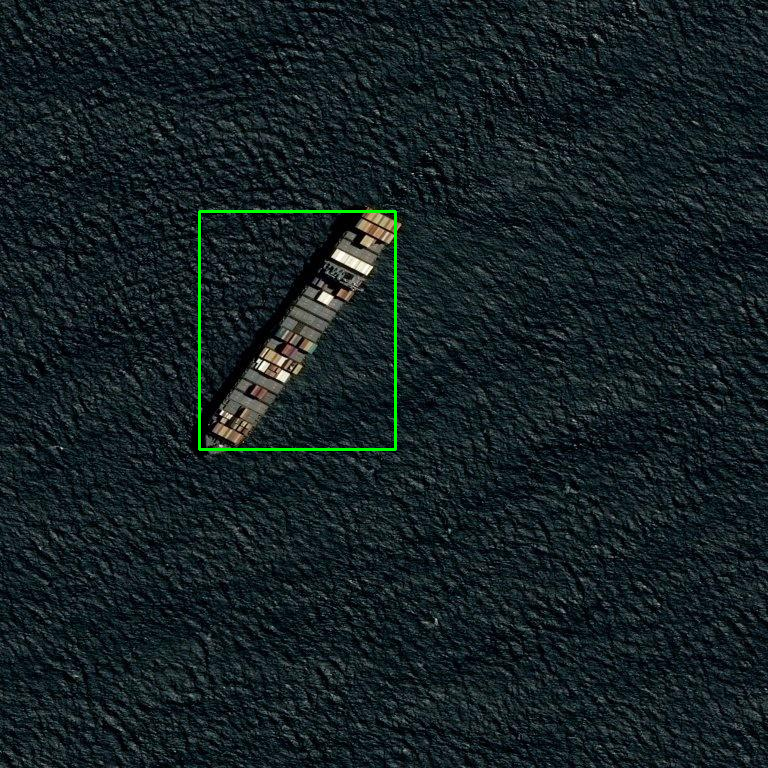

In [37]:
model = YOLO("/content/runs/detect/train/weights/best.pt")

img_path = "/content/ships-in-aerial-images/ships-aerial-images/valid/images/0006c52e8_jpg.rf.3dffdbf399b44601151f36d50bc8bba2.jpg"

img = cv2.imread(img_path)
results = model.predict(img_path, stream=True, imgsz=768, conf=0.5)

for result in results:
  boxes = result.boxes.cpu().numpy()
  for box in boxes:
    r = box.xyxy[0].astype(int)
    cv2.rectangle(img, r[:2], r[2:], (0, 255, 0), 2)

from google.colab.patches import cv2_imshow

cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()